<b>                                     Supply Chain Management Dashboard

In [2]:
#importing various libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify

In [3]:
#reading the dataset.
df = pd.read_csv('supply_chain_data.csv')

In [5]:
#All of the columns 
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [6]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [9]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [10]:
#Checking for null values 
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

 <b> Task:
<b> Analyze Product Performance and Supply Chain Efficiency

 <b> 1. Product Performance Dashboard

 <b> Product Sales: Number of products sold for each
 Product Type

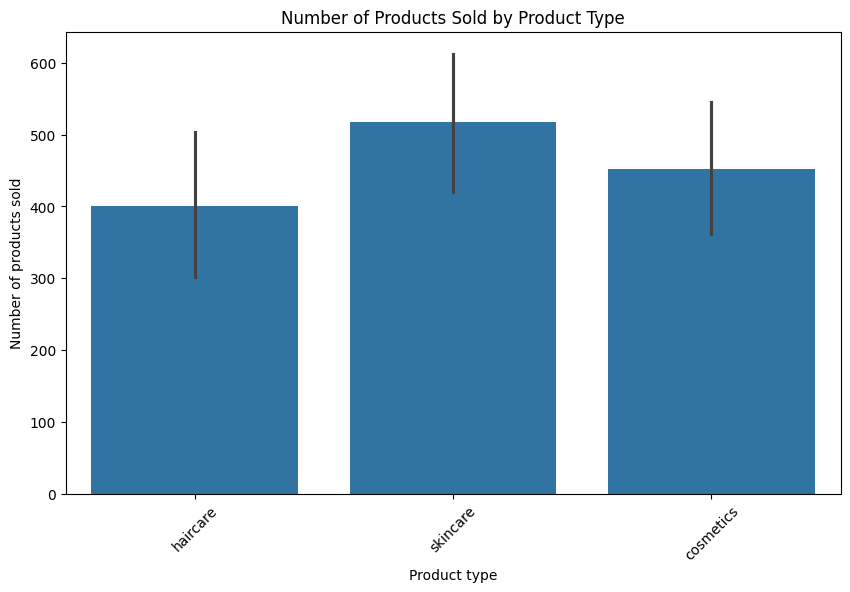

In [12]:
# Bar chart for Number of products sold by Product Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Product type', y='Number of products sold', data=df)
plt.title('Number of Products Sold by Product Type')
plt.xticks(rotation=45)
plt.show()

<b>  Price Distribution: distribution of Price for different
 Product Types.

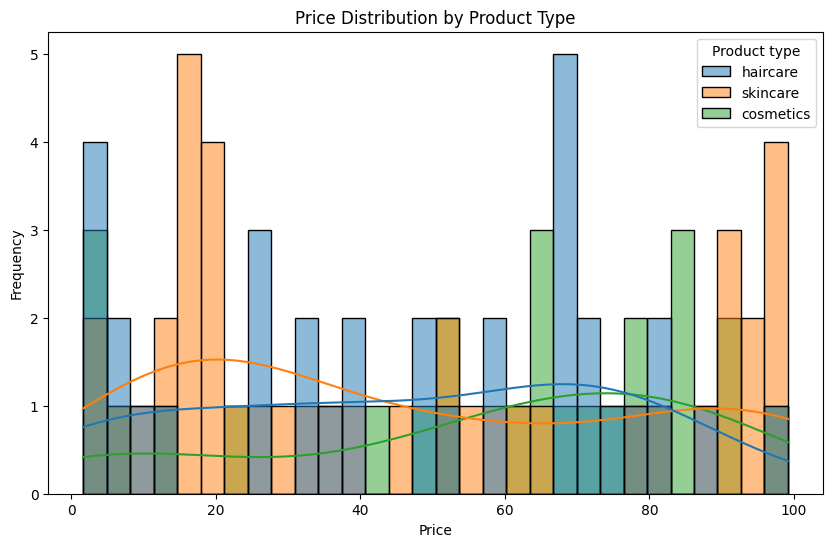

In [14]:
#Price Distribution Histogram:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=30, hue='Product type', kde=True)
plt.title('Price Distribution by Product Type')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<b> StockLevels:  heat map to visualize Stock levels across different SKU and
 Product Type

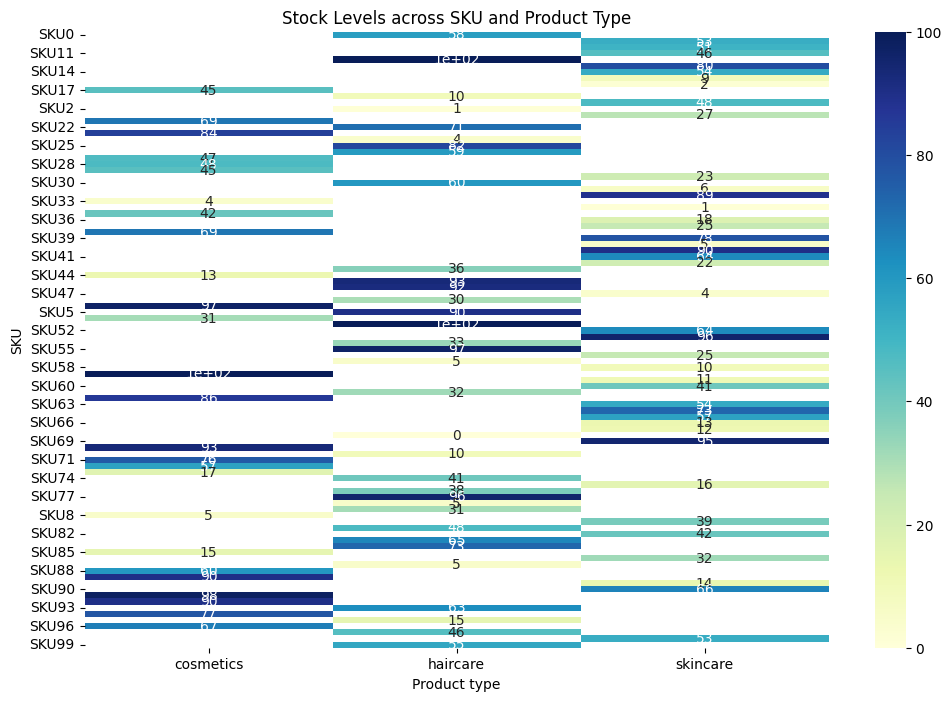

In [15]:
#Stock Levels Heat Map:
# Pivot the dataframe for the heatmap
stock_levels = df.pivot_table(index='SKU', columns='Product type', values='Stock levels', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(stock_levels, annot=True, cmap='YlGnBu')
plt.title('Stock Levels across SKU and Product Type')
plt.show()

<b> 2. Supply Chain Efficiency Dashboard:

<b> Lead Timesvs. Order Quantities: scatter plot to analyze the relationship between
 Lead times and Order quantities across different Supplier names

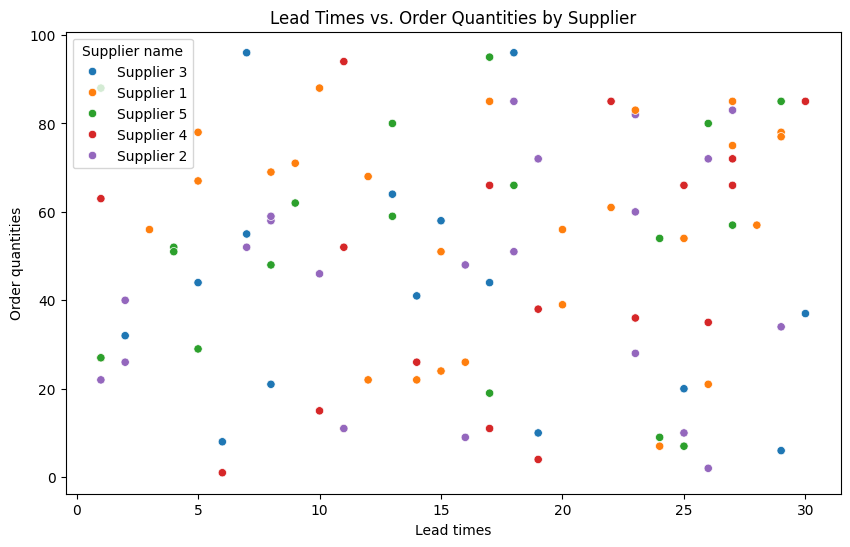

In [17]:
#Lead Times vs. Order Quantities Scatter Plot:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Lead times', y='Order quantities', hue='Supplier name')
plt.title('Lead Times vs. Order Quantities by Supplier')
plt.show()

<b> Shipping Costs by Carrier: bar chart showing Shipping costs per Shipping
 carrier. Filtered it by Location to see regional differences.

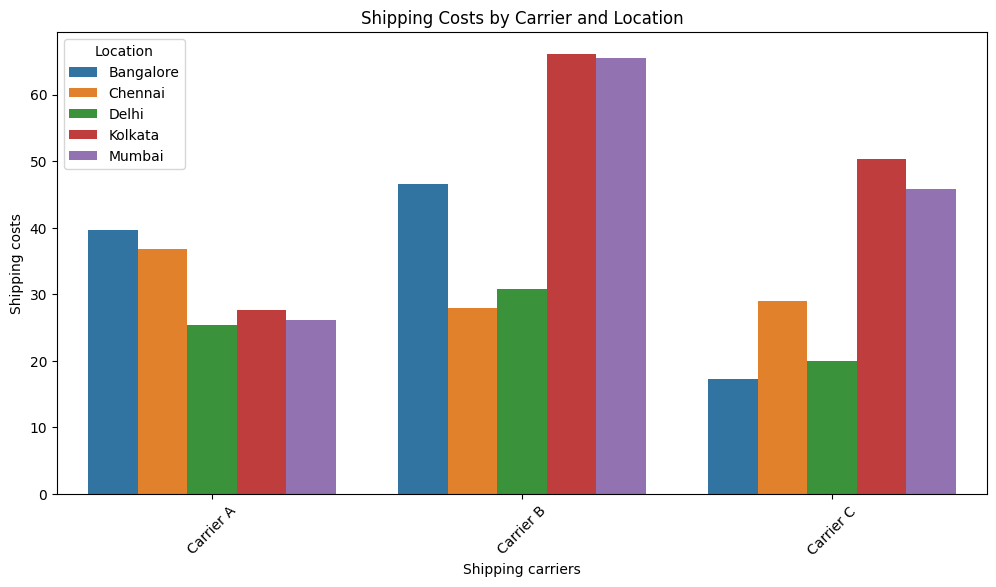

In [18]:
#Shipping Costs by Carrier Bar Chart:
shipping_costs = df.groupby(['Shipping carriers', 'Location'])['Shipping costs'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=shipping_costs, x='Shipping carriers', y='Shipping costs', hue='Location')
plt.title('Shipping Costs by Carrier and Location')
plt.xticks(rotation=45)
plt.show()

<b>  Defect Rates: pie chart or a bar chart to visualize Defect rates by Supplier
 name or Location

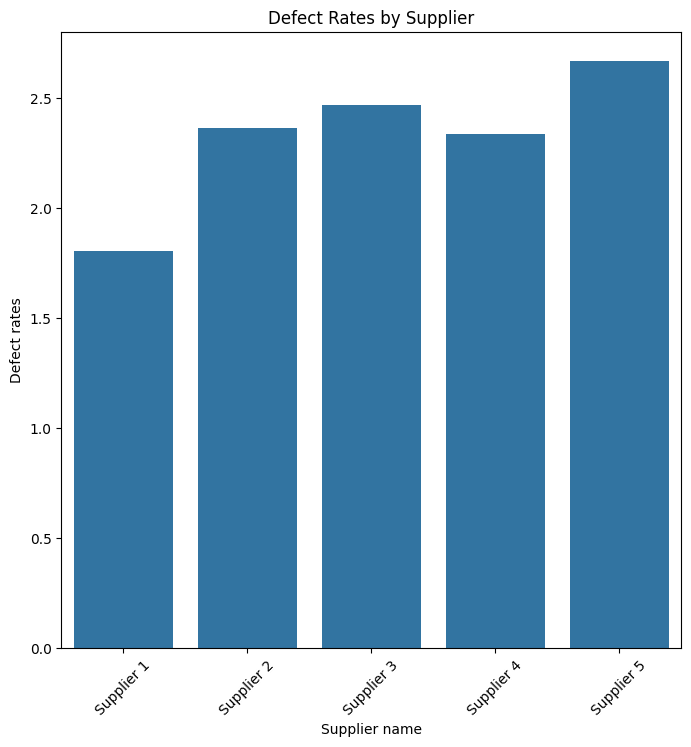

In [20]:
defect_rates = df.groupby('Supplier name')['Defect rates'].mean().reset_index()

plt.figure(figsize=(8, 8))
sns.barplot(data=defect_rates, x='Supplier name', y='Defect rates')
plt.title('Defect Rates by Supplier')
plt.xticks(rotation=45)
plt.show()

<b>  3. Customer Demographics: (a): Demographic Breakdown: a pie chart to show the breakdown of customers by age group, gender, or other
 available demographics

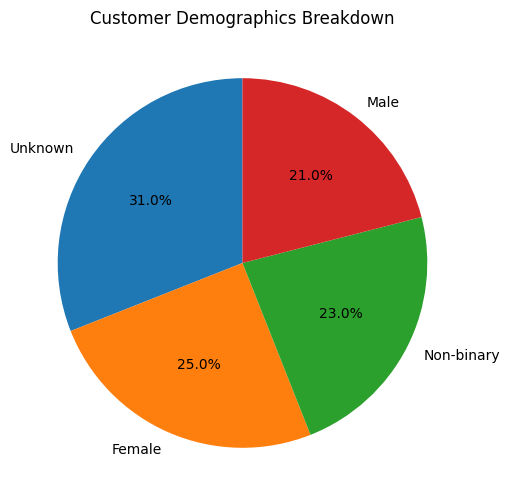

In [21]:
#C. Customer Demographics
#Demographic Breakdown Chart:
demographic_distribution = df['Customer demographics'].value_counts()

plt.figure(figsize=(10, 6))
demographic_distribution.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Customer Demographics Breakdown')
plt.ylabel('')
plt.show()

<b> (b): Revenue by Demographics: treemap to show Revenue generated segmented
 by Customer demographics.

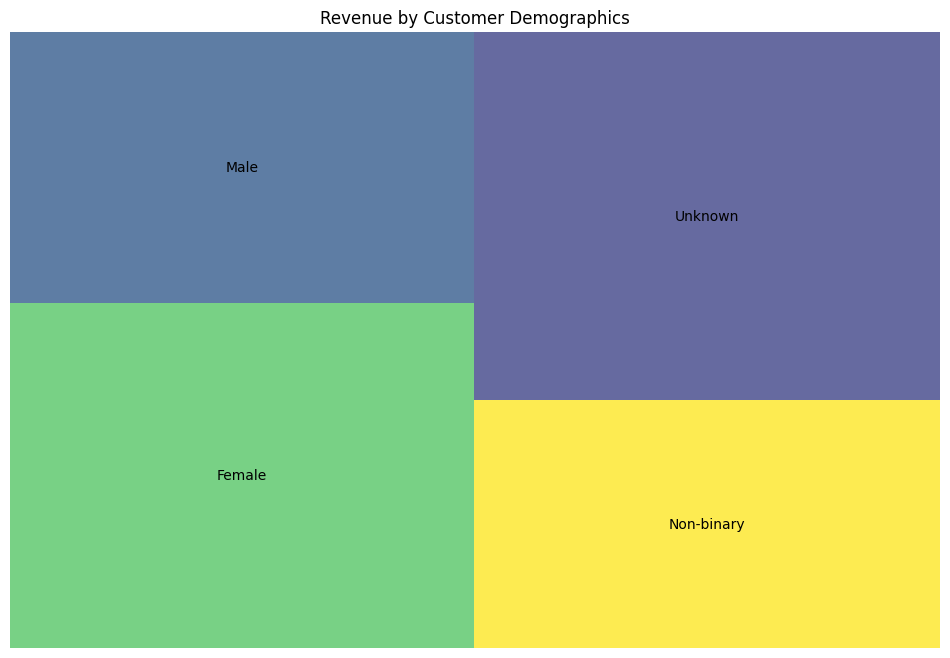

In [22]:
#Revenue by Demographics Treemap:
revenue_demographics = df.groupby('Customer demographics')['Revenue generated'].sum().reset_index()

plt.figure(figsize=(12, 8))
squarify.plot(sizes=revenue_demographics['Revenue generated'], label=revenue_demographics['Customer demographics'], alpha=.8)
plt.title('Revenue by Customer Demographics')
plt.axis('off')
plt.show()

 <b> 5. Analysis Questions: 1: Which Product Type generates the highest revenue

In [23]:
highest_revenue = df.groupby('Product type')['Revenue generated'].sum().idxmax()
print(f"The product type that generates the highest revenue is: {highest_revenue}")

The product type that generates the highest revenue is: skincare


<b> The product type that generates the highest revenue is: skincare

<b> 2: Are there any significant correlations between Lead times and Order quantities?

In [24]:
#Significant Correlations Between Lead Times and Order Quantities:
correlation = df['Lead times'].corr(df['Order quantities'])
print(f"Correlation between Lead Times and Order Quantities: {correlation}")

Correlation between Lead Times and Order Quantities: 0.10545932302505706


<b> Correlation between Lead Times and Order Quantities: 0.10545932302505706

<b> 3. How do Shipping costsvary by Shipping carrier and Location

In [26]:
#Shipping Costs by Carrier and Location: 
efficiency = df.groupby('Supplier name').agg({'Manufacturing lead time': 'mean', 'Production volumes': 'sum'})
efficiency['Efficiency Ratio'] = efficiency['Production volumes'] / efficiency['Manufacturing lead time']
most_efficient_supplier = efficiency['Efficiency Ratio'].idxmax()
print(f"The most efficient supplier is: {most_efficient_supplier}")
#Most Efficient Suppliers:

The most efficient supplier is: Supplier 1


<b> The most efficient supplier is: Supplier 1


<b> 4:   Whatdemographic group contributes the most to sales

In [29]:
#Demographic Group Contributing the Most to Sales
top_demographic = df.groupby('Customer demographics')['Revenue generated'].sum().idxmax()
print(f"The demographic group that contributes the most to sales is: {top_demographic}")

The demographic group that contributes the most to sales is: Unknown


<b> The demographic group that contributes the most to sales is: Unknown